In [1]:
"""
Created on Thu Oct 31 00:10:21 2019

@author: mytufail
"""
"Collecting the data"
"---------------------------------------------------------------------------------------------------------------"
import pandas as pd
df1=pd.read_csv('seeds.csv',header=None)
"The following two lines of code will display everything (instead of truncated form) when using .head() command"
"--------------------------------------------------------------------------------------------------------------"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
"---------------------------------------------------------------------------------------------------------------"
#print(df.head())
samples=df1.drop(7,axis=1).values


In [2]:
# In this excercise we will learn how to choose a good number of clusters for a dataset using the 
#k-means inertia graph. 

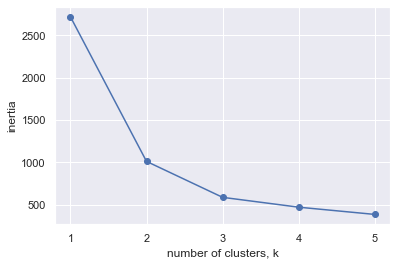

In [4]:
import seaborn as sns     # Not necessary.But I prefer
sns.set()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Conclusion:
- The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

In [5]:
#In the previous exercise, I have observed from the inertia plot that 3 is a good number of clusters for the
# grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and 
# "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to 
# the grain varieties (separate .csv file is uploaded in the folder) using a cross-tabulation.
"getting data"
"---------------------"
varieties=pd.read_csv('varieties.csv')
varieties=varieties['0'].values

In [6]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


Conclusion: 
- The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. 
- But depending on the type of data you are working with, the clustering may not always be this good. Another Repository is uploaded to handle this situation to imporove clustering.